# ML Prequisite Exam

# 1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

-> Total Additions:- n*(k-1)*m
-> Total Multiplication:- n*k*m

-> Let's say there are two matrices A(n X k) and B(k x m). 
   In C=AXB, We get every element of C by following formula
   
   $$
   C_{ij}= \sum_{l=1}^{k} A_{i,l}*B_{l,j}
  $$ 
  
  -> Total k multiplication to get single element of C and there are n*m elements in C. Hence n*k*m multiplication
  
  -> Similarly to get single element of C , (k-1) additions requried , Hence n*(k-1)*m additions. 
  

# 2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?



In [6]:
import timeit
import numpy as np
def multiply(A,B):

    C=[]
    for ra in A:
        li=[]
        for i in range(0,len(B[0])):
            sum=0
            for k in range(0,len(ra)):
                sum=sum+ra[k]*B[k][i]
            li.append(sum)
        C.append(li)

    #print('C: ',C)


def numpy_mul(A,B):
    C=np.dot(A,B)
if __name__ == '__main__':

    A= np.random.rand(100, 100)
    B = np.random.rand(100, 100)
    elapsed_time = timeit.timeit(lambda :multiply(A.tolist(),B.tolist()), number=10)
    elapsed_time_numpy = timeit.timeit(lambda : numpy_mul(A,B), number=10)
    print("total time in normal multiplication: ",elapsed_time)
    print("total time in numpy multiplication: ",elapsed_time_numpy)

total time in normal multiplication:  0.6437435999978334
total time in numpy multiplication:  0.0015785000286996365


Here we can see numpy multiplication takes lesser time compare to for loop multiplication because NumPy is built on optimized C 

# 3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [7]:
import numpy as np
import timeit

def find_median_numpy(a):
    np.median(a)
    #print("median using numpy: ",np.median(a))

def find_median(li):
    max = 0
    length = len(li) // 2
    for i in range(0, length + 1):

        max = li[0]
        p = 0;
        for j in range(1, len(li)):
            if (li[j] > max):
                max = li[j]
                p = j
        li.pop(p)


if __name__ == '__main__':
    a = np.random.rand(10001)

    li = a.tolist()
    #print(li)
    elapsed_time = timeit.timeit(lambda: find_median(li), number=1)
    elapsed_time_numpy = timeit.timeit(lambda: find_median_numpy(a), number=1)
    print("total time in normal median finding: ", elapsed_time)
    print("total time in numpy median finding: ", elapsed_time_numpy)


total time in normal median finding:  1.8635882998351008
total time in numpy median finding:  0.0003627000842243433


Here also numpy median takes less time than normal method of median finding.

# 4) What is the gradient of the following function with respect to x and y?
   $$ 
    x^2y+y^3\sin(x)
  $$

   $$ 
   f(x, y) = x^{2}y + y^{3}\sin(x)
   $$

   $$ \frac{\partial f}{\partial x} = 2xy + y^3\cos(x) $$
   
   $$ 
   f(x, y) = x^{2}y + y^{3}\sin(x)
   $$

   $$ \frac{\partial f}{\partial y} = x^{2} + 3y^2\sin(x) $$
   


# 5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [1]:
import jax.numpy as jnp
from jax import grad

def f(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

x = jnp.array(2.0)
y = jnp.array(3.0)

grad_f = grad(f,(0,1))
gradient = grad_f(x, y)

print("Gradient:", gradient)



Gradient: (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))


Here I am  getting gradient vector (0.7640352,28.55103) usign JAX and by manual method also getting same.

# 6) Use sympy to confirm that you obtain the same gradient analytically.

In [2]:
import sympy.vector as sp
import sympy as sp_
from sympy.vector import CoordSys3D

R = CoordSys3D('R')
# R.x=2
# R.y=3
expr = R.x**2 * R.y + R.y**3 * sp_.sin(R.x)
gradient = sp.gradient(expr, True)
print("Gradient:", gradient)

Gradient: (2*R.x*R.y + R.y**3*cos(R.x))*R.i + (R.x**2 + 3*R.y**2*sin(R.x))*R.j


# 7)  Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [5]:
mydict={}
mydict[2022]={'branch1':[],'branch2':[]}
mydict[2023]={'branch1':[],'branch2':[]}
mydict[2024]={'branch1':[],'branch2':[]}
mydict[2025]={'branch1':[],'branch2':[]}

marks={'maths':50,'physics':60,'chemistry':90}

name=['A','B','C','D']
i=0
for n in name:
    mydict[2022]['branch1'].append({'rno':i,'name':n,'marks':marks})
    mydict[2022]['branch2'].append({'rno':i,'name':n,'marks':marks})
    mydict[2023]['branch1'].append({'rno':i,'name':n,'marks':marks})
    mydict[2023]['branch2'].append({'rno':i,'name':n,'marks':marks})
    mydict[2024]['branch1'].append({'rno':i,'name':n,'marks':marks})
    mydict[2024]['branch2'].append({'rno':i,'name':n,'marks':marks})
    mydict[2025]['branch1'].append({'rno':i,'name':n,'marks':marks})
    mydict[2025]['branch2'].append({'rno':i,'name':n,'marks':marks})
    i=i+1
print(mydict)
    

{2022: {'branch1': [{'rno': 0, 'name': 'A', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}, {'rno': 1, 'name': 'B', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}, {'rno': 2, 'name': 'C', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}, {'rno': 3, 'name': 'D', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}], 'branch2': [{'rno': 0, 'name': 'A', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}, {'rno': 1, 'name': 'B', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}, {'rno': 2, 'name': 'C', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}, {'rno': 3, 'name': 'D', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}]}, 2023: {'branch1': [{'rno': 0, 'name': 'A', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}, {'rno': 1, 'name': 'B', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}, {'rno': 2, 'name': 'C', 'marks': {'maths': 50, 'physics': 60, 'chemistry': 90}}, {'rno': 3, 'name': 'D', 'marks': {'maths': 50, 'physics

# 8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subje

In [7]:
class Year:
    def __init__(self,year):
        self.year=year
        self.branch=[]
    def add(self,branch):
        self.branch.append(branch)

class Branch:
    def __init__(self,name):
        self.name=name
        self.students=[]
    def add(self,student):
        self.students.append(student)

class Student:
    def __init__(self,rno,name,phy,chem,maths):
        self.rno=rno
        self.name=name
        self.phy=phy
        self.chem=chem
        self.maths=maths


Year_2022=Year(2022)
Year_2023=Year(2022)
Year_2024=Year(2022)
Year_2025=Year(2022)

s1=Student(1,'Amit',40,50,60)
s2=Student(2,'Bhavik',40,60,60)
s3=Student(3,'Chirag',70,30,100)
s4=Student(4,'Dixit',70,90,40)

b1=Branch('branch1')
b2=Branch('branch2')

b1.add(s1)
b1.add(s2)
b1.add(s3)
b1.add(s4)

b2.add(s1)
b2.add(s2)
b2.add(s3)
b2.add(s4)

Year_2022.add(b1)
Year_2022.add(b2)
Year_2023.add(b1)
Year_2023.add(b2)
Year_2024.add(b1)
Year_2024.add(b2)
Year_2025.add(b1)
Year_2025.add(b2)

list=[Year_2022,Year_2023,Year_2024,Year_2025]

print("name: ",list[0].branch[0].students[0].name)



name:  Amit


# 9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

# i) $$ y =x $$

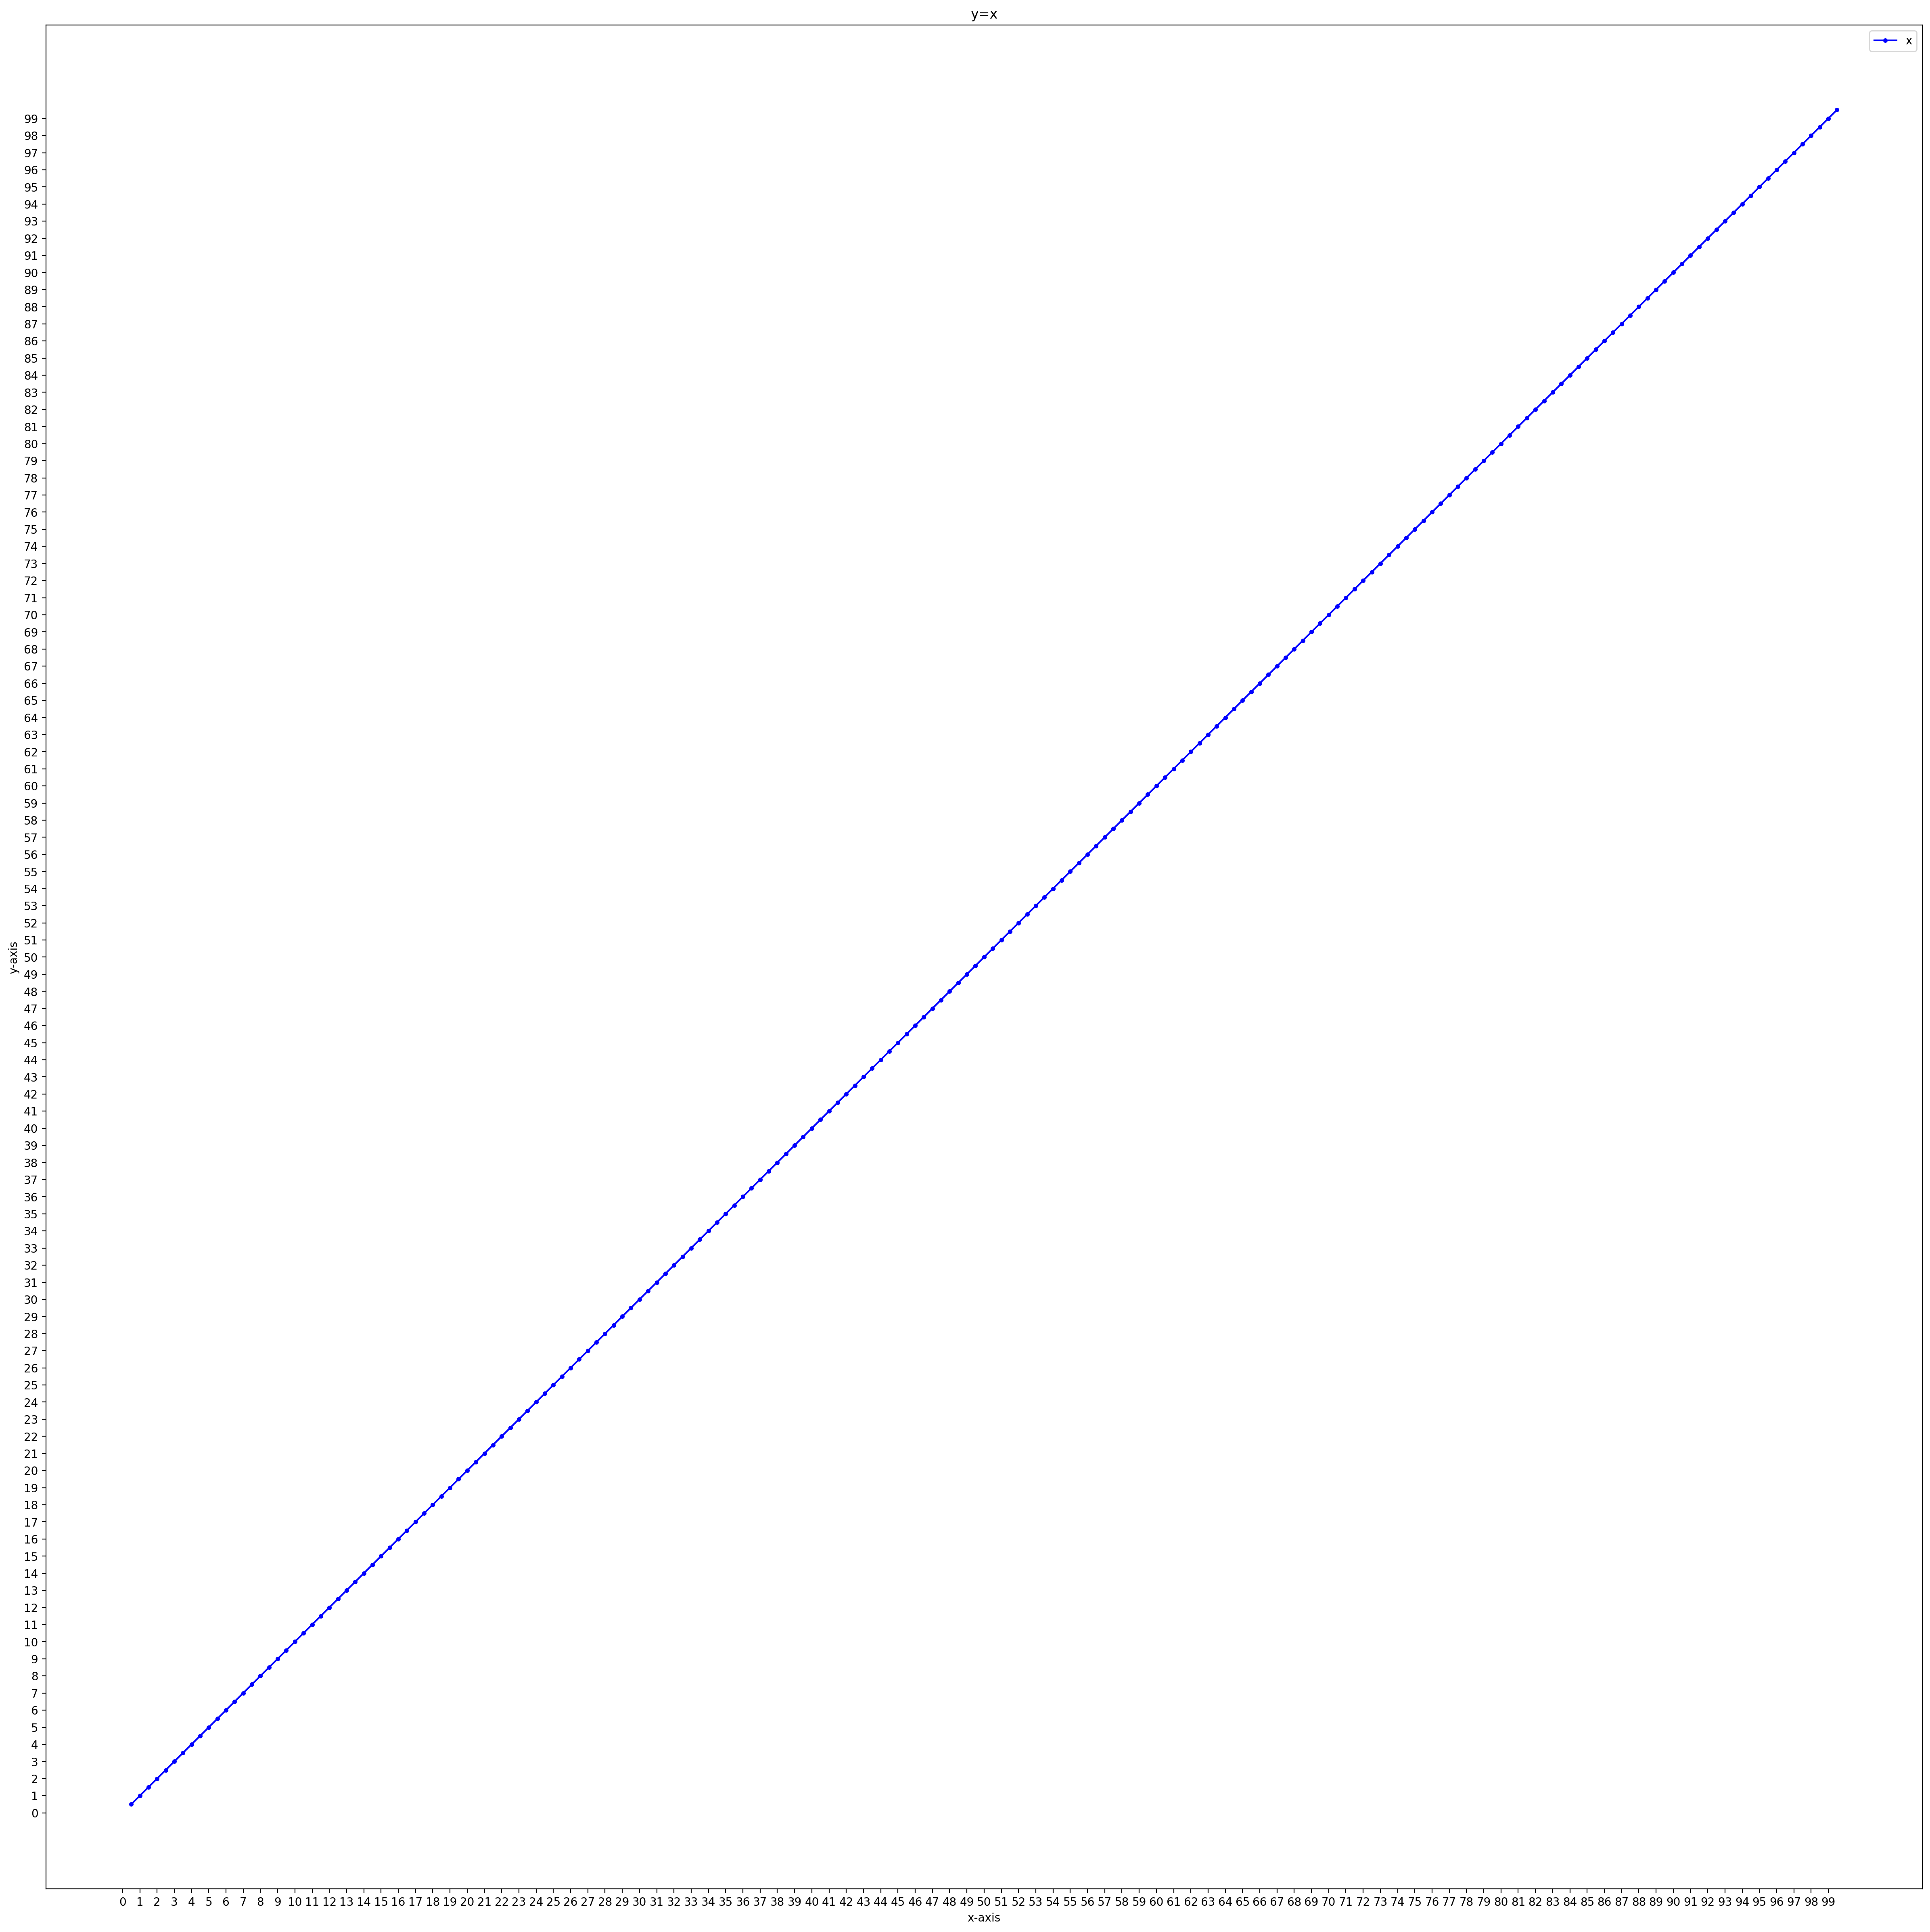

In [20]:
import matplotlib.pyplot as plt 
import numpy as np
plt.figure(figsize=(30,30),dpi=200)
x=np.arange(0.5,100,0.5)

plt.plot(x,x,'b.-',label='x')
plt.title('y=x')

plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.xticks(np.arange(0,100,1))
plt.yticks(np.arange(0,100,1))

plt.legend() 
plt.show()

# ii) $$ y = x^2 $$

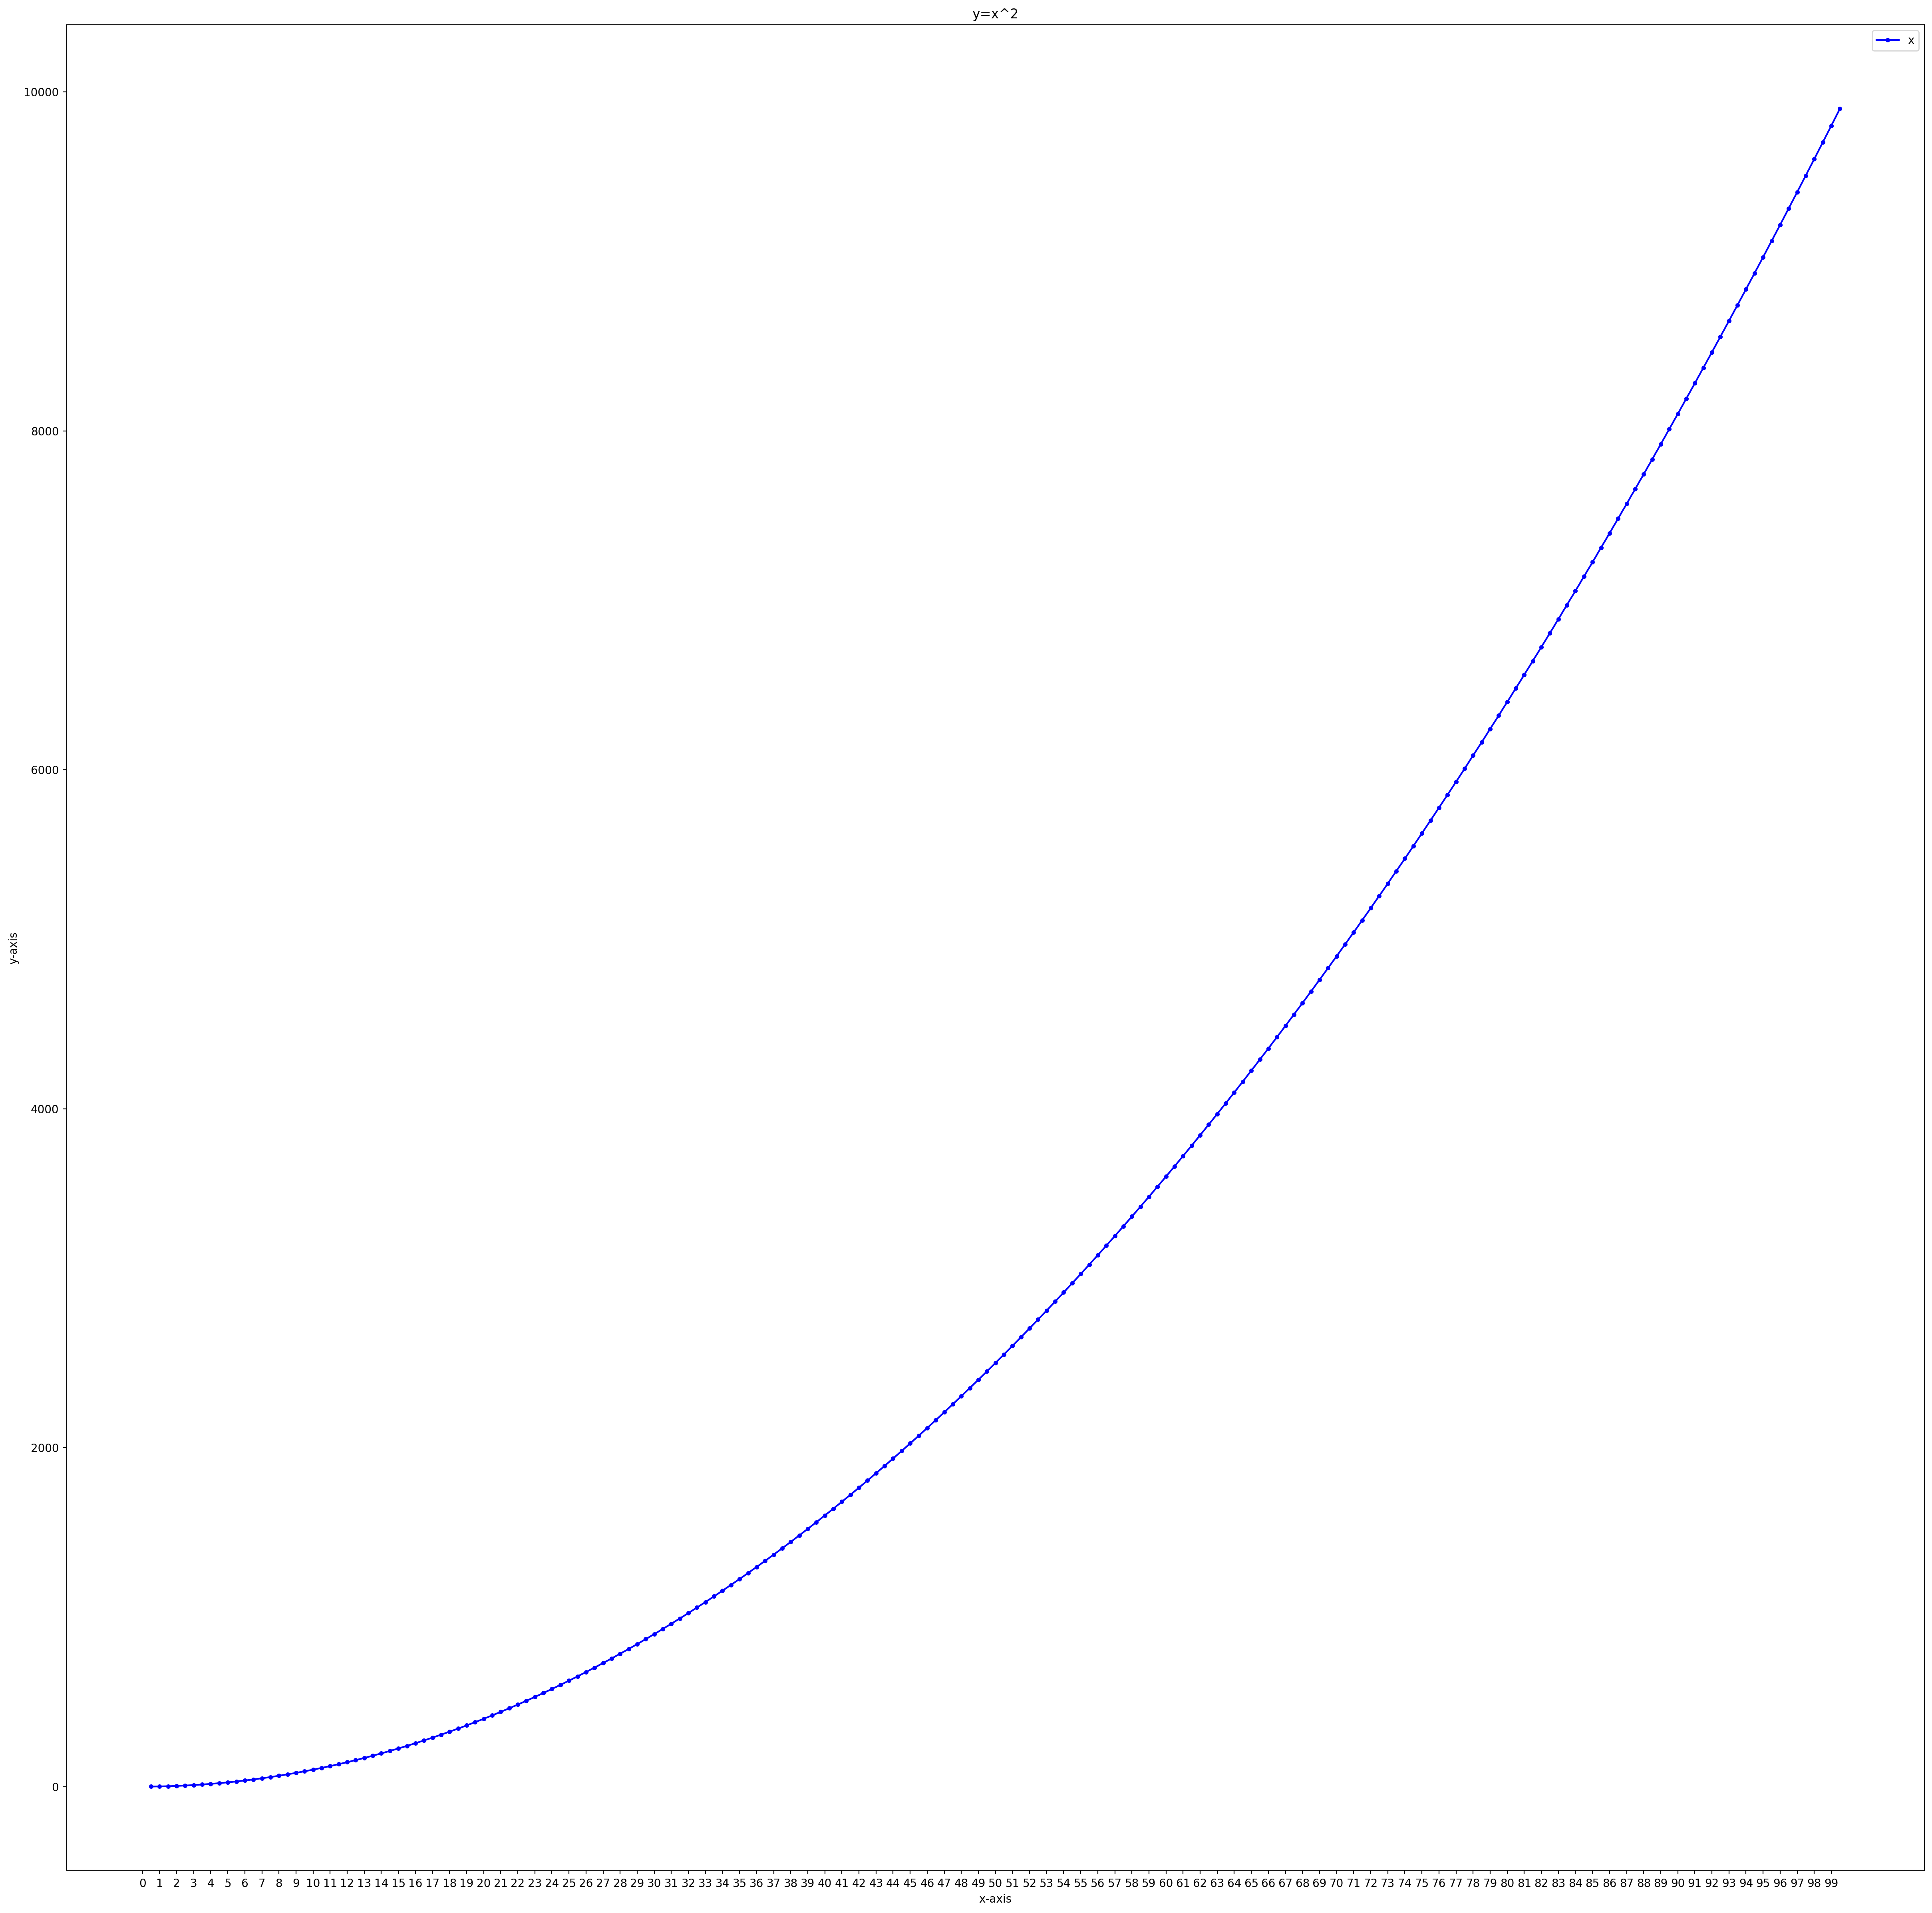

In [22]:
import matplotlib.pyplot as plt 
import numpy as np
plt.figure(figsize=(30,30),dpi=200)
x=np.arange(0.5,100,0.5)

plt.plot(x,x**2,'b.-',label='x')
plt.title('y=x^2')

plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.xticks(np.arange(0,100,1))
#plt.yticks(np.arange(0,100,1))

plt.legend() 
plt.show()

# iii) $$ y = \frac{x^3}{100} $$

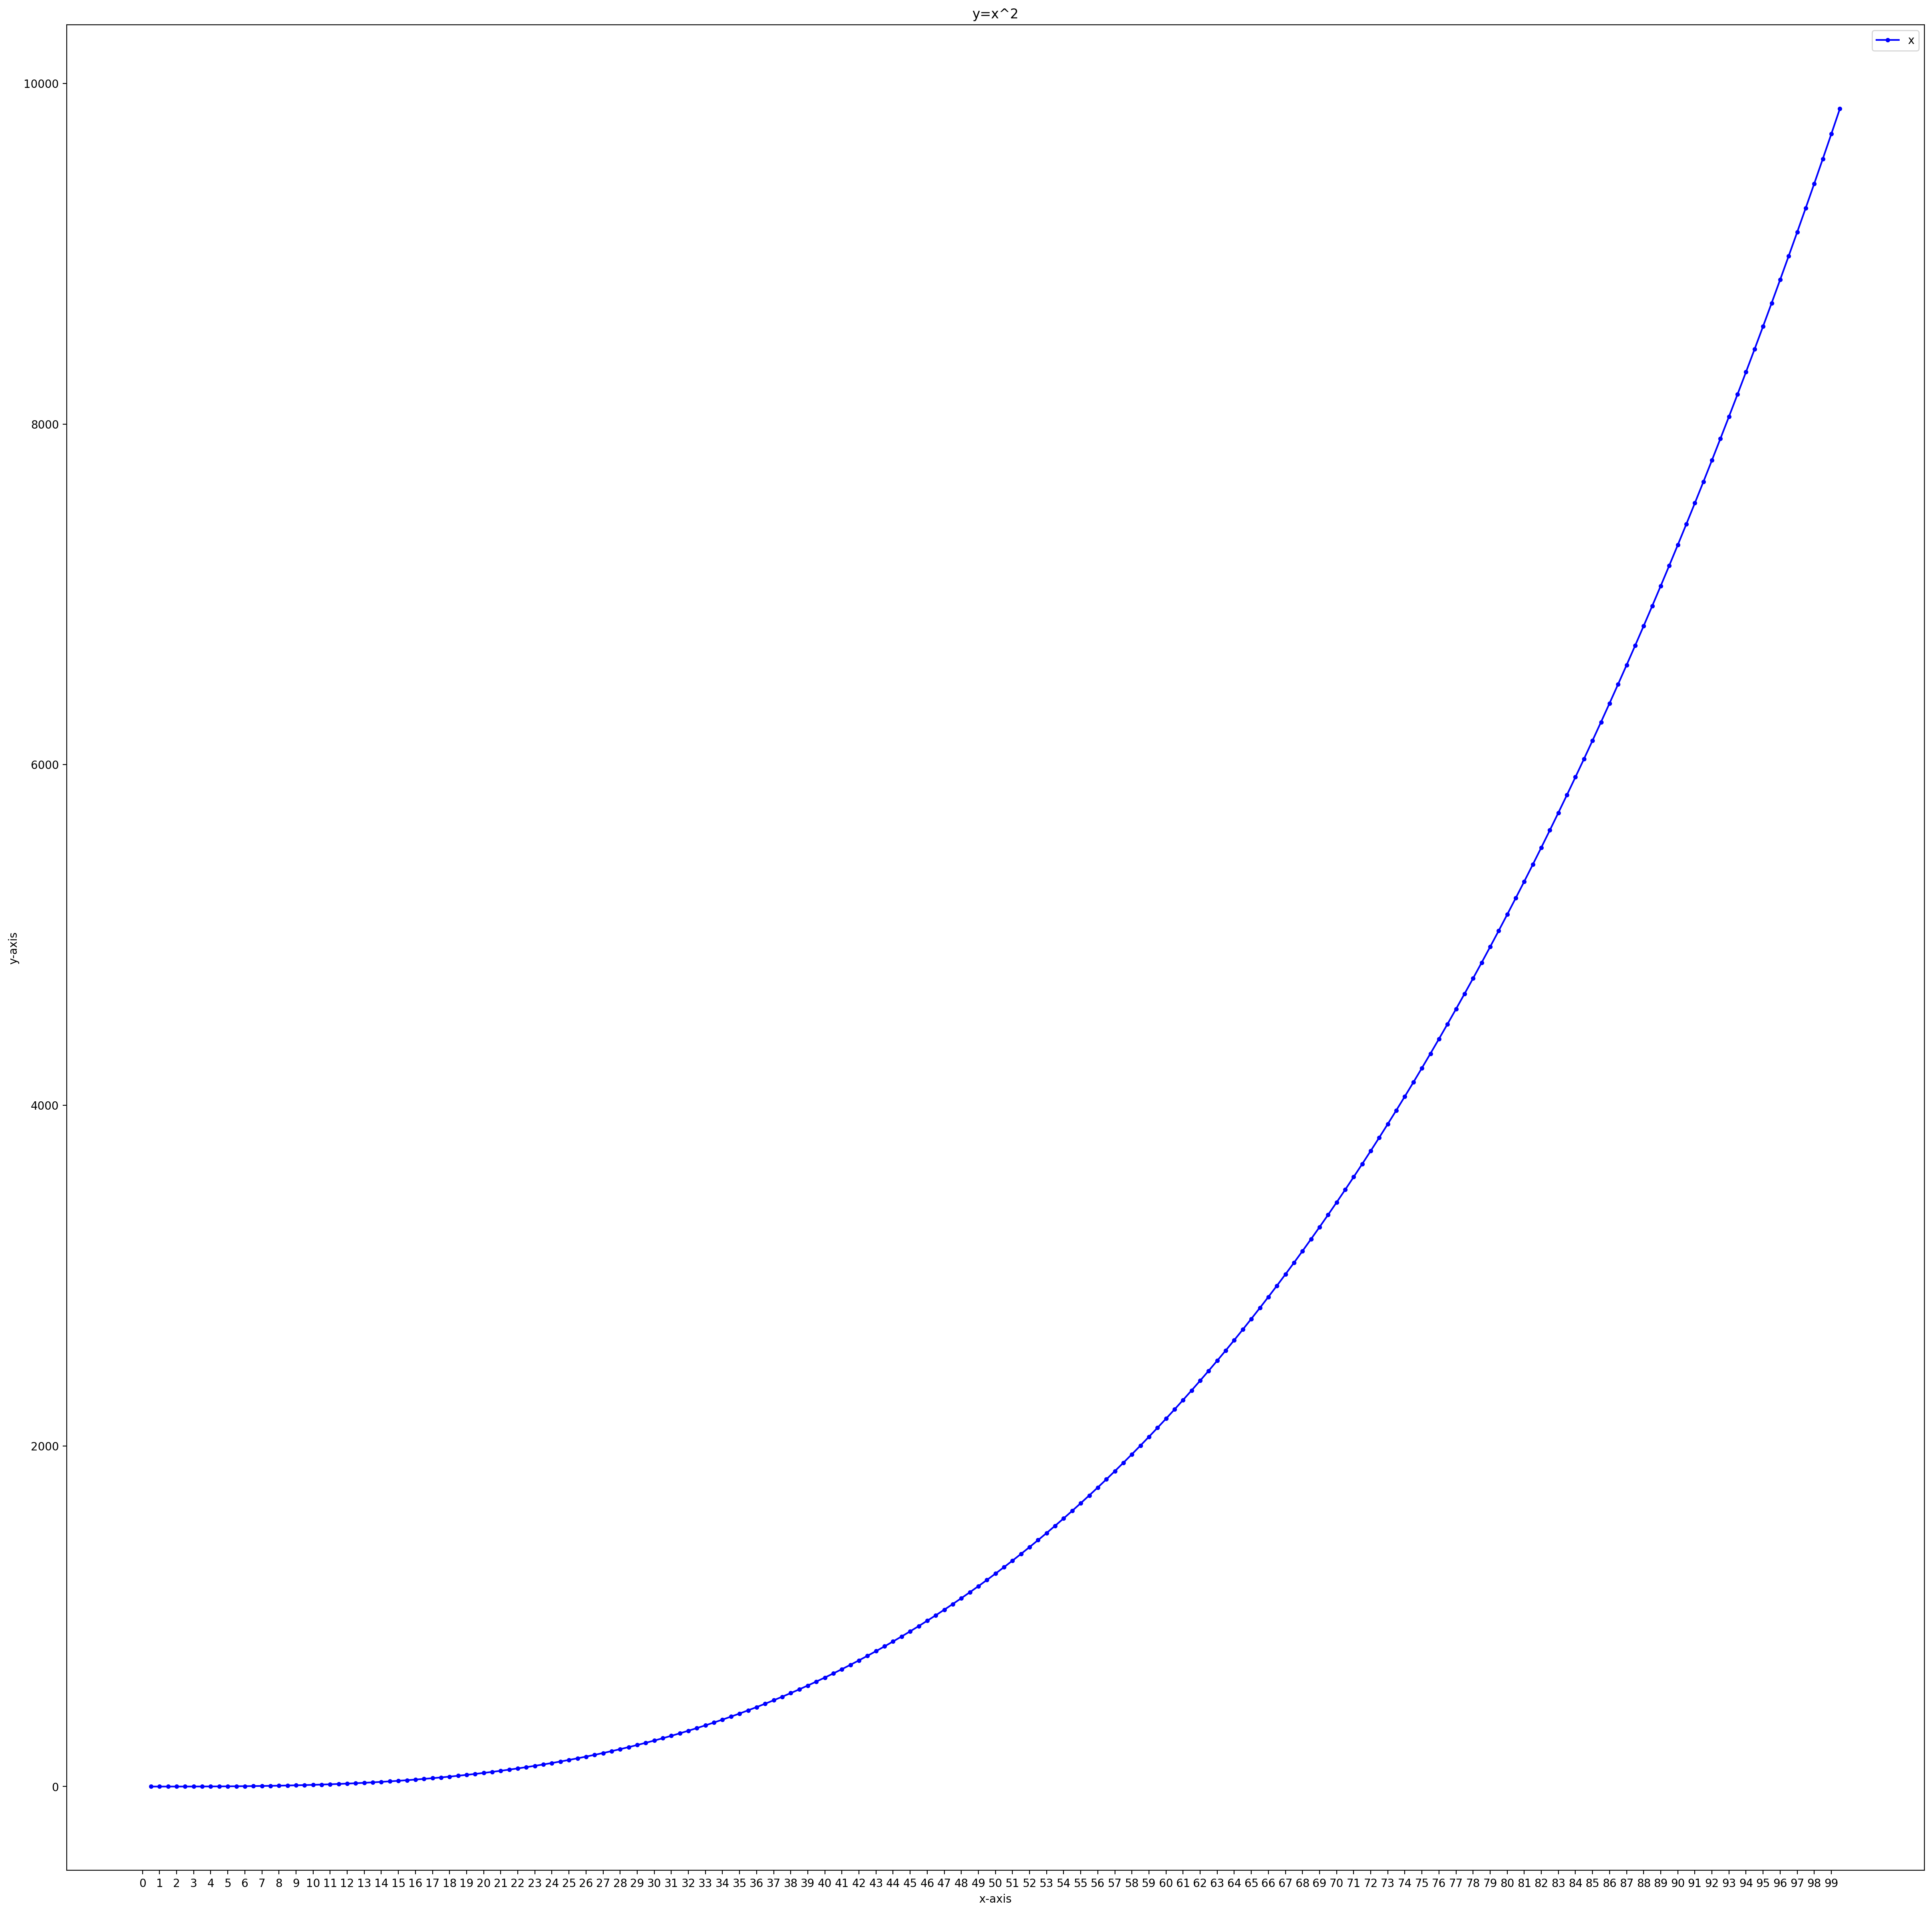

In [23]:
import matplotlib.pyplot as plt 
import numpy as np
plt.figure(figsize=(30,30),dpi=200)
x=np.arange(0.5,100,0.5)

plt.plot(x,(x**3/100),'b.-',label='x')
plt.title('y=x^3/100')

plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.xticks(np.arange(0,100,1))
#plt.yticks(np.arange(0,100,1))

plt.legend() 
plt.show()

# iv) $$ y = \sin(x)  $$

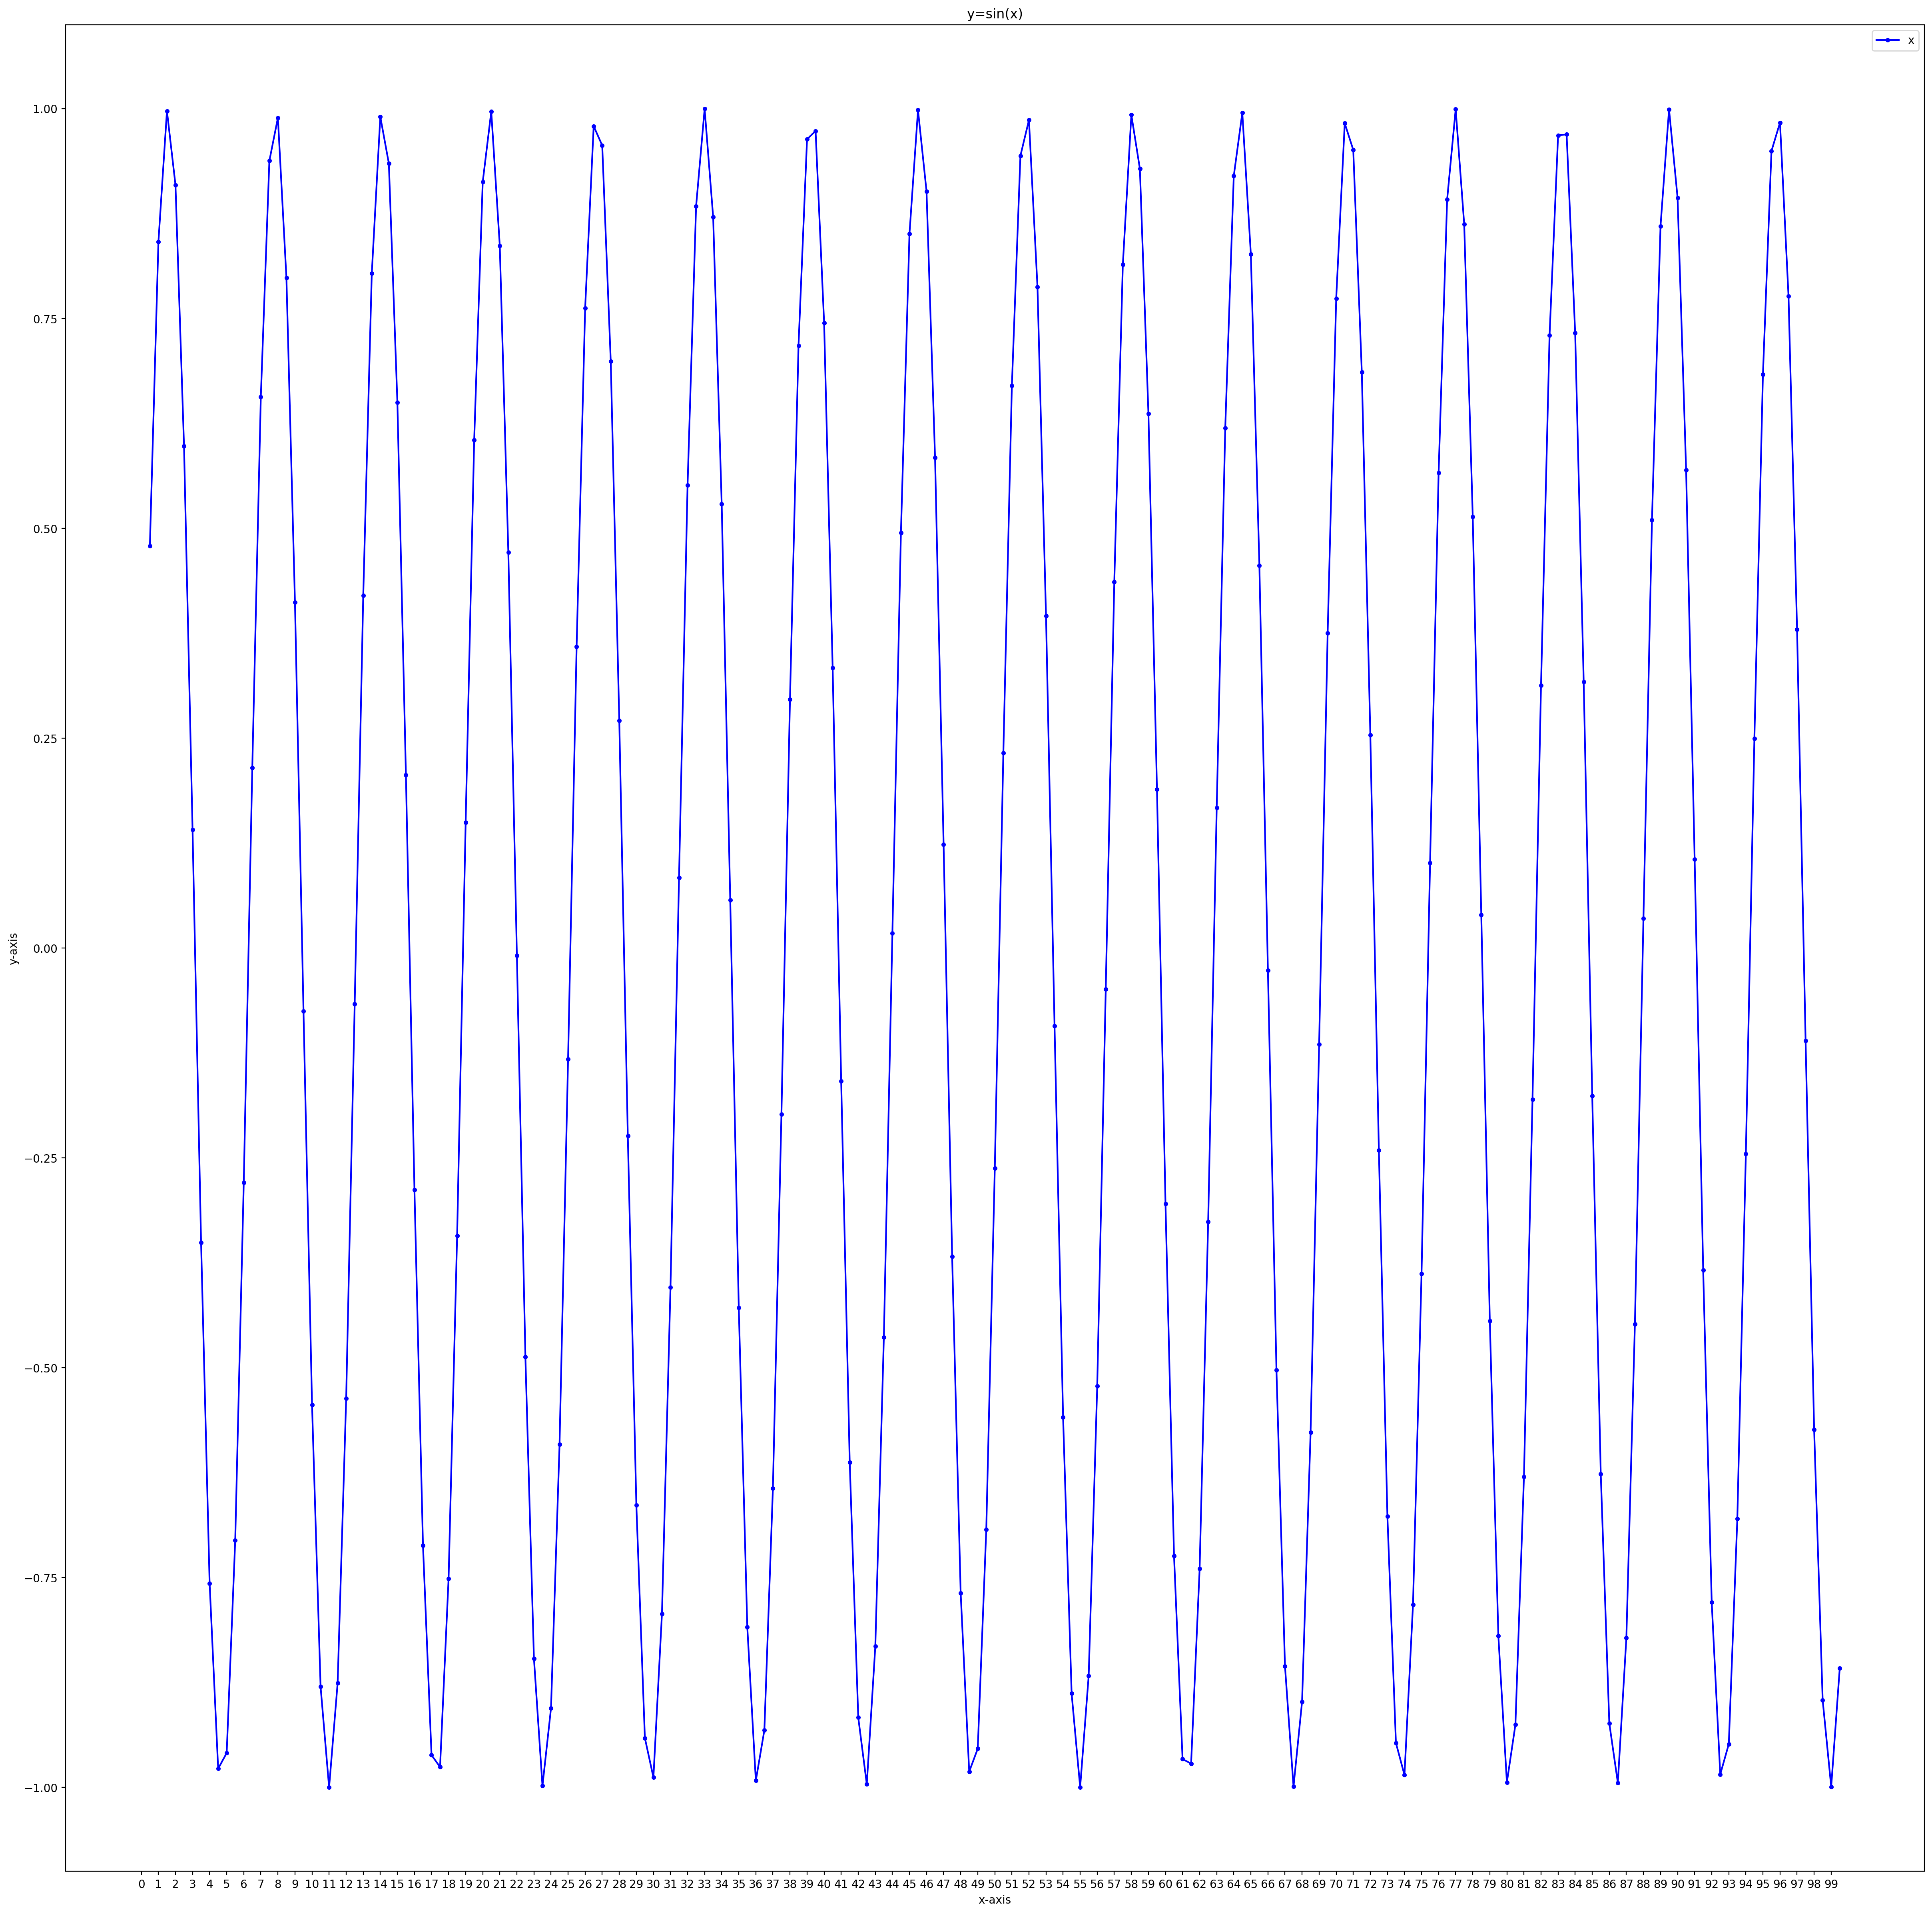

In [25]:
import matplotlib.pyplot as plt 
import numpy as np
import cmath
plt.figure(figsize=(30,30),dpi=200)
x=np.arange(0.5,100,0.5)

plt.plot(x,np.sin(x),'b.-',label='x')
plt.title('y=sin(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.xticks(np.arange(0,100,1))
#plt.yticks(np.arange(0,100,1))

plt.legend() 
plt.show()

# v) $$  y = \frac{\sin(x)}{x} $$

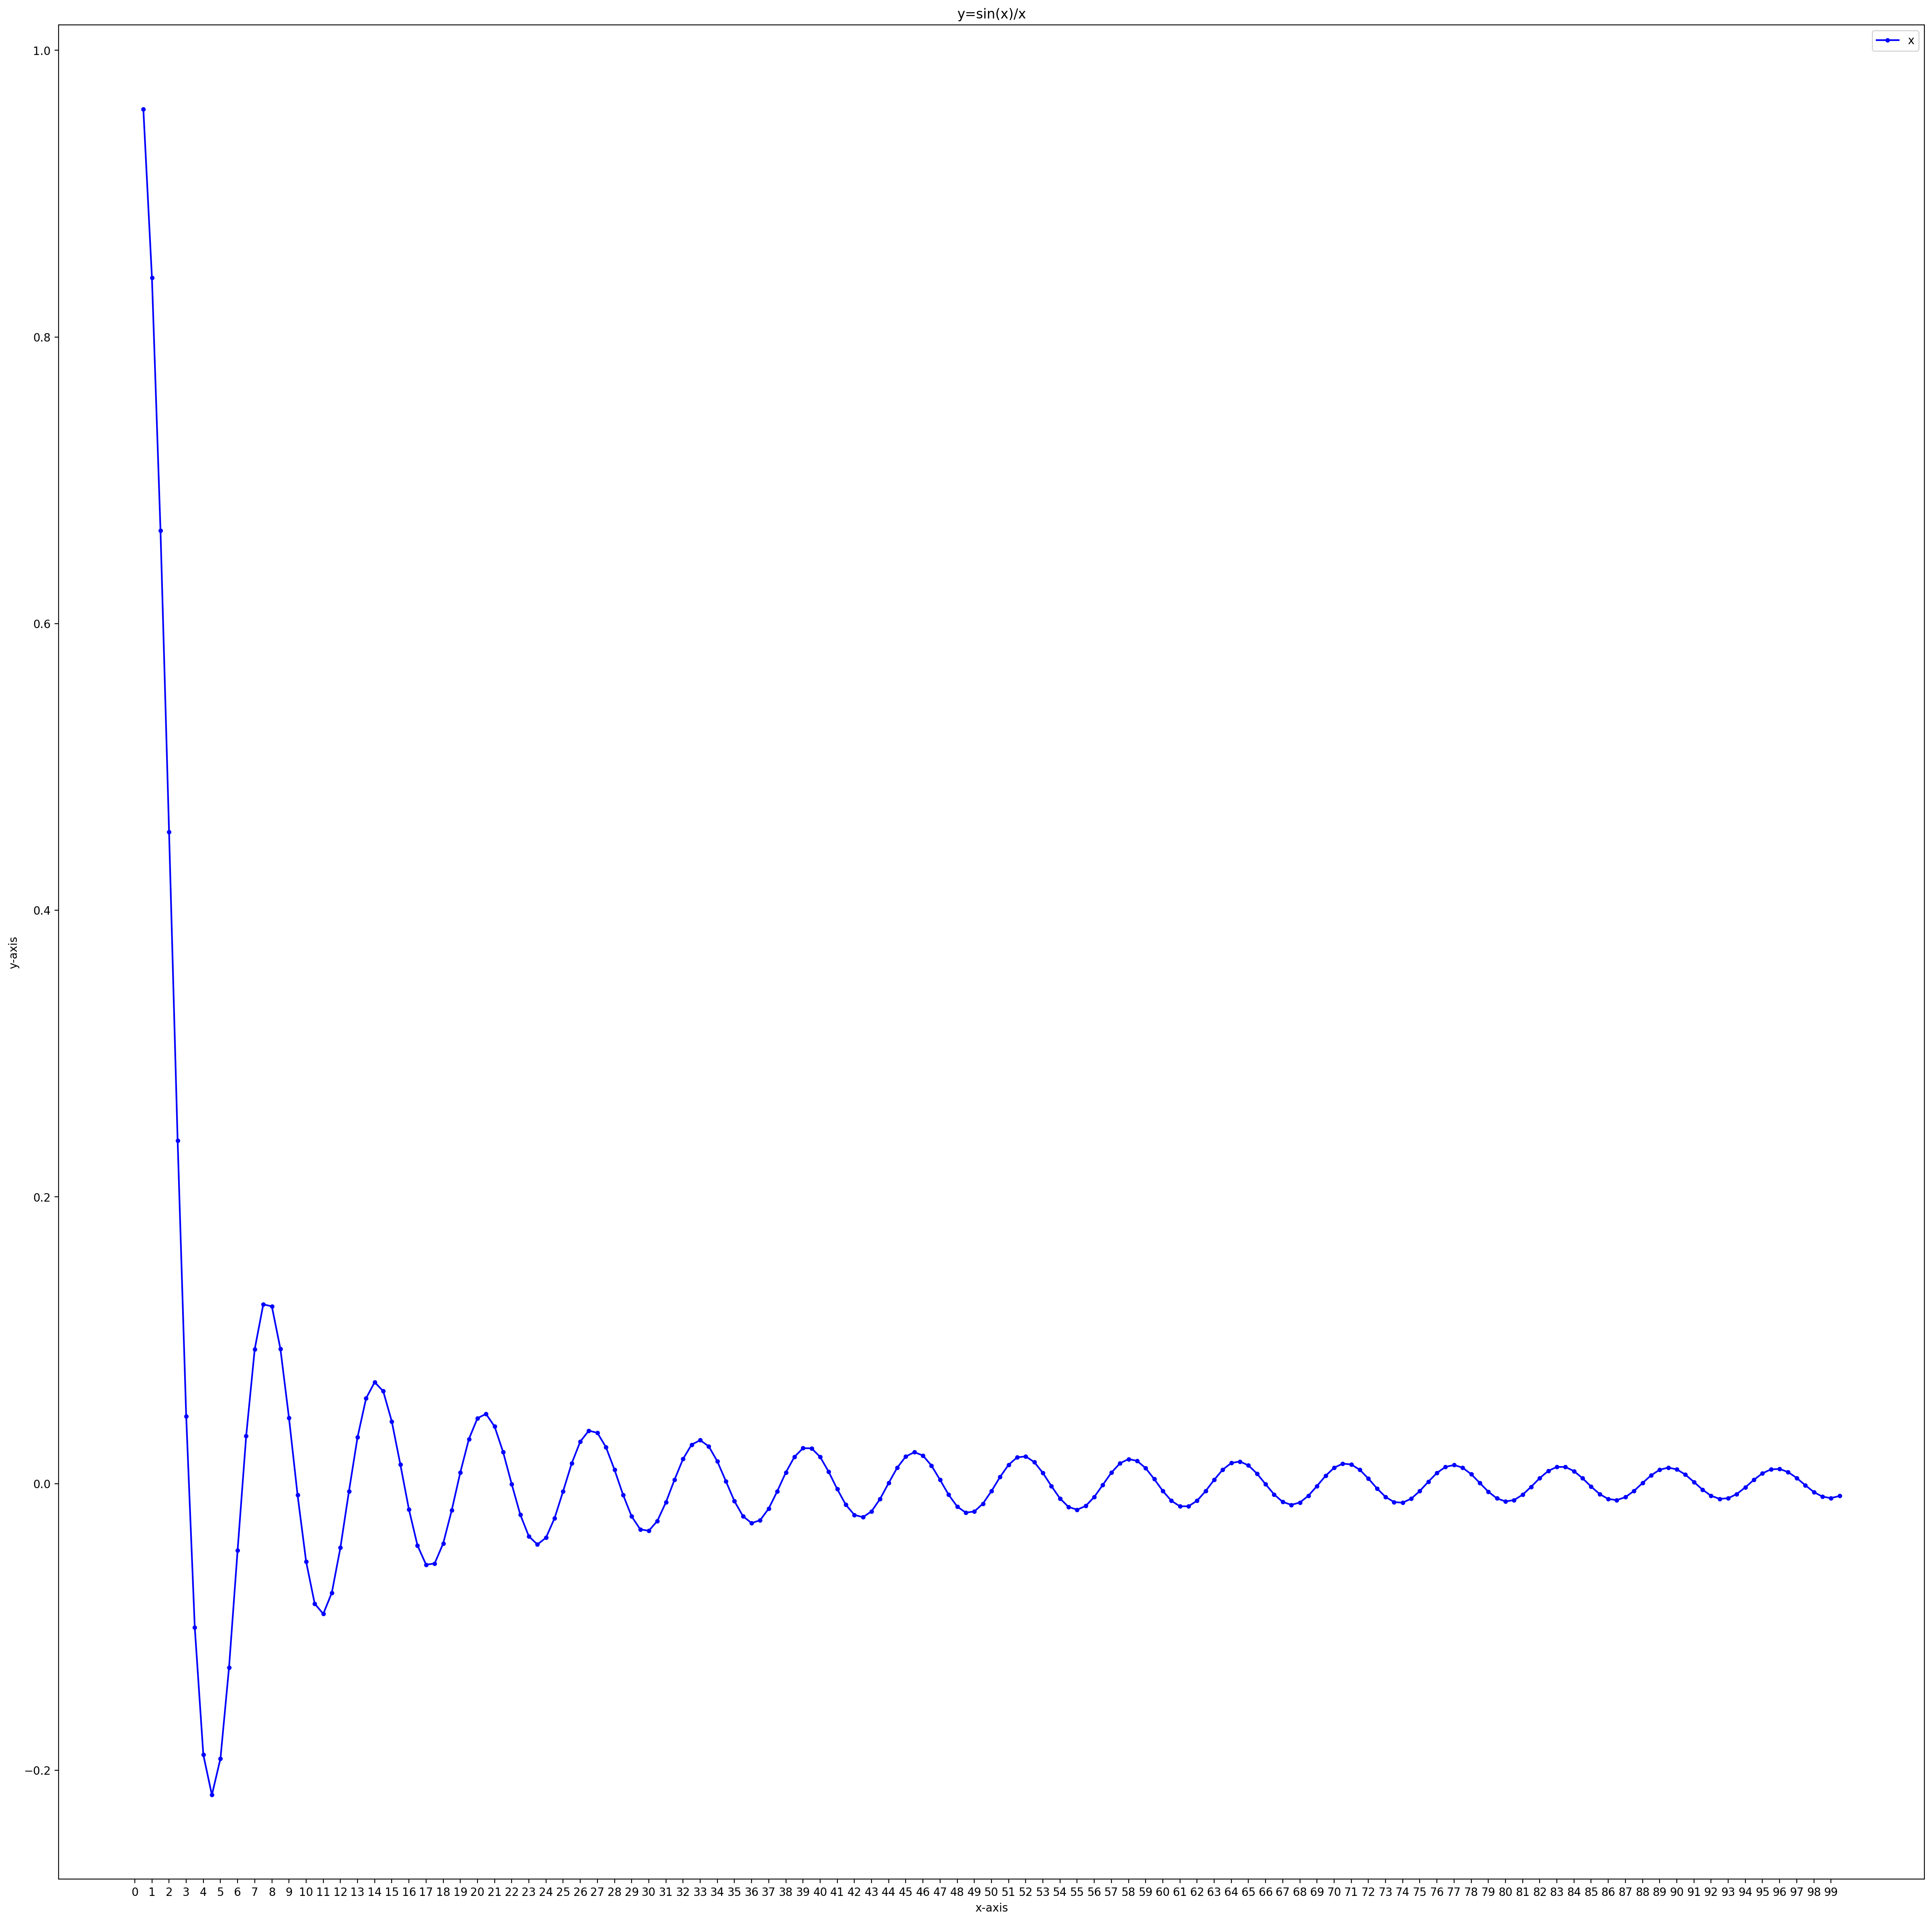

In [27]:
import matplotlib.pyplot as plt 
import numpy as np
plt.figure(figsize=(30,30),dpi=200)
x=np.arange(0.5,100,0.5)

plt.plot(x,np.sin(x)/x,'b.-',label='x')
plt.title('y=sin(x)/x')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.xticks(np.arange(0,100,1))
#plt.yticks(np.arange(0,100,1))

plt.legend() 

# vi) $$ y = \log(x)  $$

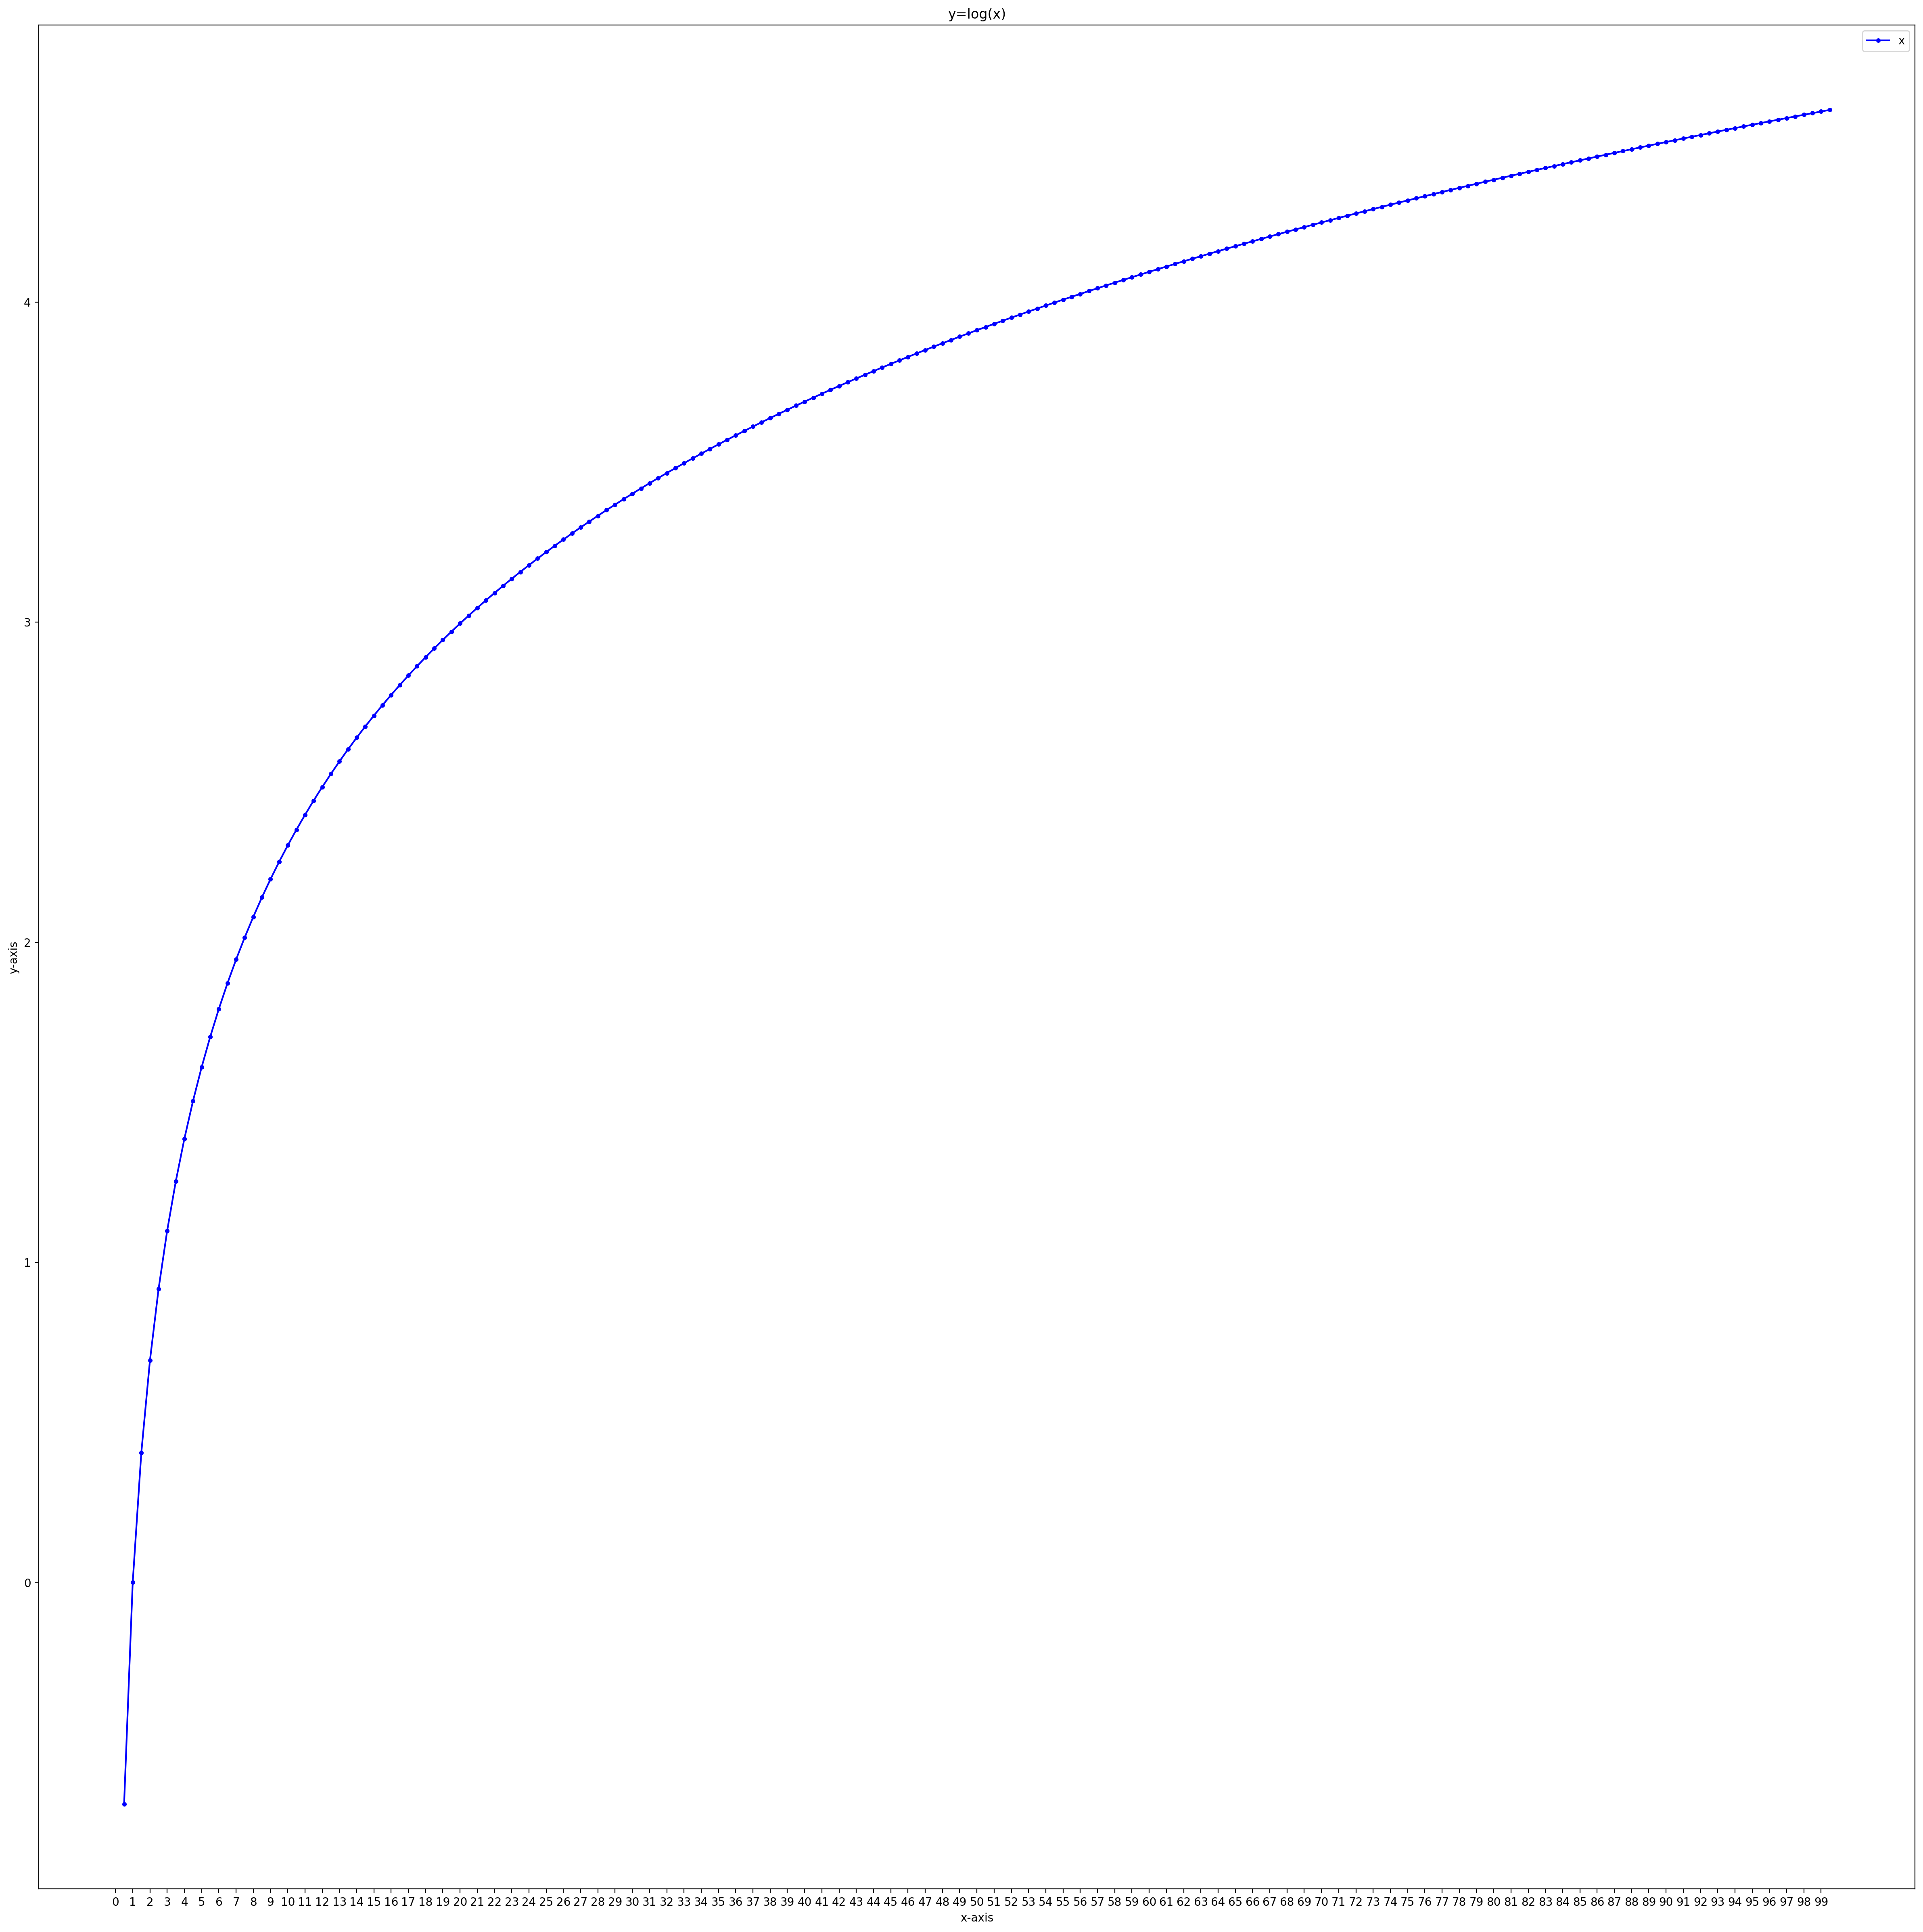

In [29]:
import matplotlib.pyplot as plt 
import numpy as np
plt.figure(figsize=(30,30),dpi=200)
x=np.arange(0.5,100,0.5)

plt.plot(x,np.log(x),'b.-',label='x')
plt.title('y=log(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.xticks(np.arange(0,100,1))
#plt.yticks(np.arange(0,100,1))
plt.legend() 

# vii) $$ y = e^x $$

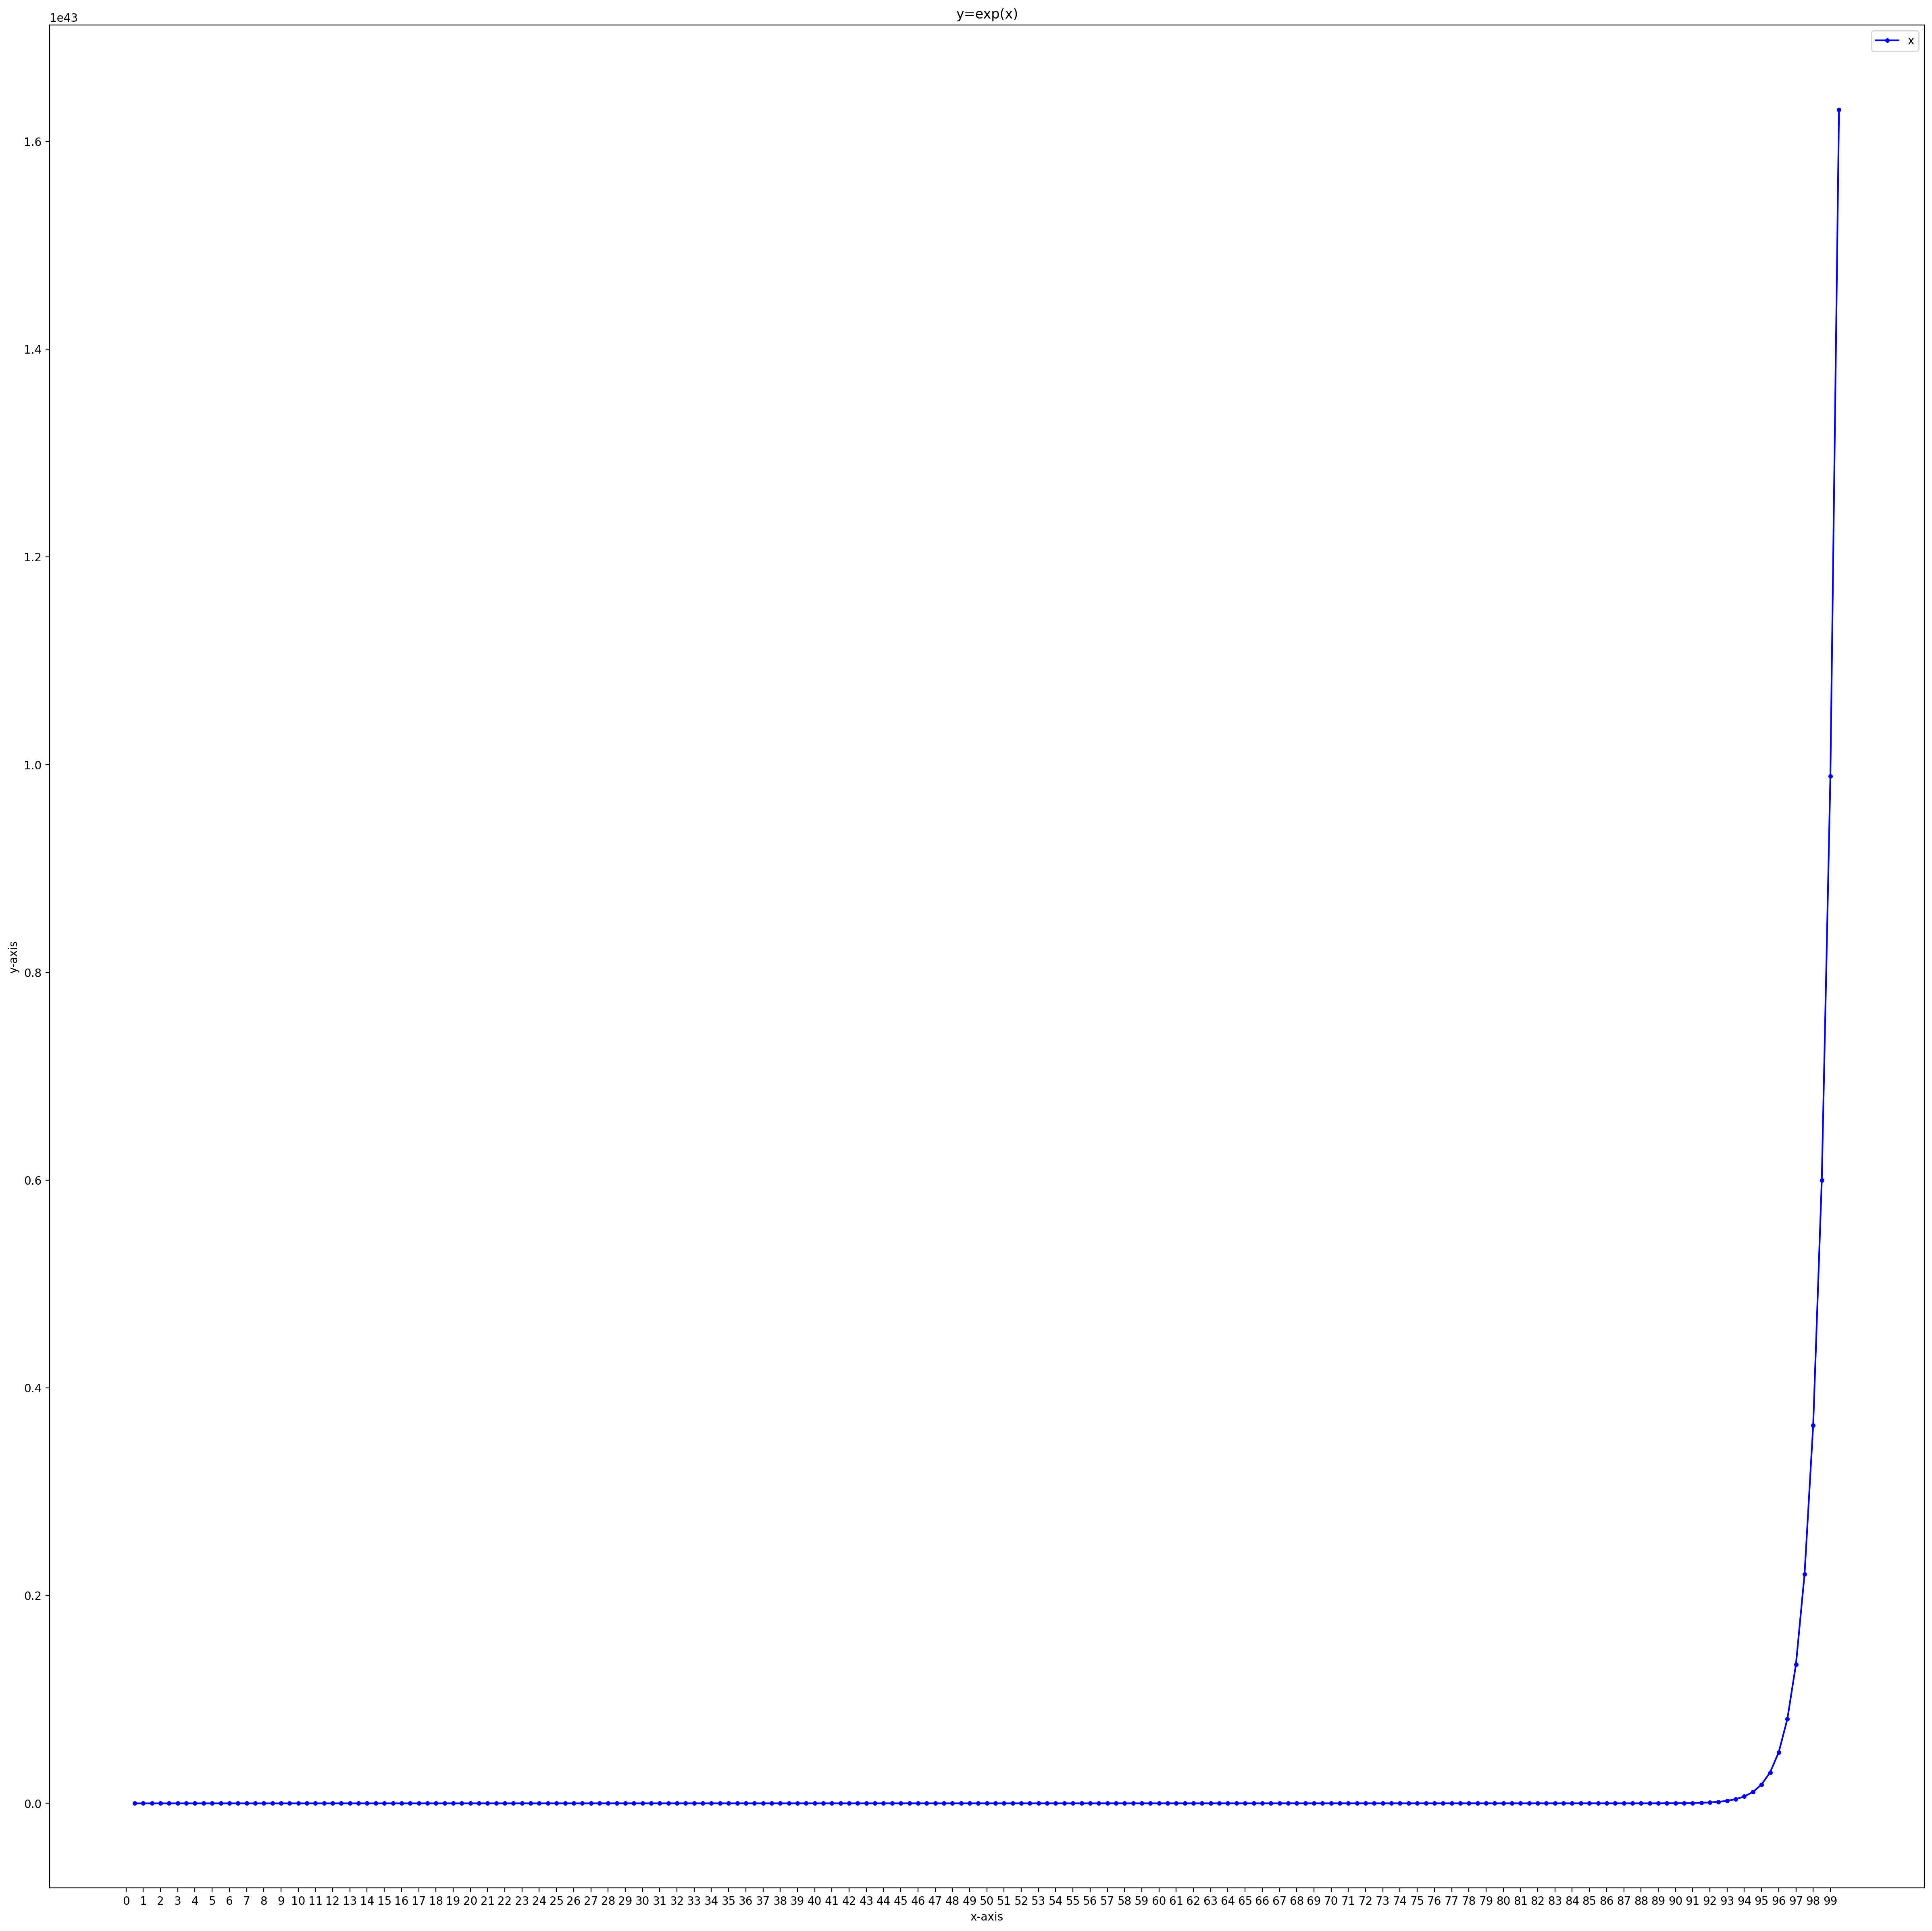

In [31]:
import matplotlib.pyplot as plt 
import numpy as np
plt.figure(figsize=(30,30),dpi=200)
x=np.arange(0.5,100,0.5)

plt.plot(x,np.exp(x),'b.-',label='x')
plt.title('y=exp(x)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.xticks(np.arange(0,100,1))
#plt.yticks(np.arange(0,100,1))
plt.legend() 

# 10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [43]:
import pandas as pd
import numpy as np

df=pd.DataFrame(np.random.rand(20,5),columns=['a','b','c','d','e'])
std_div=df.std(axis=0)
std_div
max_std_col = std_div.idxmax()
mean=df.mean(axis=1)
max_mean_row=mean.idxmax()

print("column with max std deviation: ",max_std_col)
print("row with max mean: ",max_mean_row)


column with max std deviation:  a
row with max mean:  14


# 11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [52]:
df['f']=df['a']+df['b']+df['c']+df['d']+df['e']

df.loc[(df['f']<8),['g']]='LT8'
df.loc[(df['f']>8),['g']]='GT8'


print("number of rows in the dataframe where the value in the column “g” is “LT8” is:  ",len(df.loc[(df['g']=='LT8'),:]))

print("std deviation of f having LT8: ",df.loc[(df['g']=='LT8'),:]['f'].std())
print("std deviation of f having GT8: ",df.loc[(df['g']=='GT8'),:]['f'].std())


number of rows in the dataframe where the value in the column “g” is “LT8” is:   20
std deviation of f having LT8:  0.822979537135213
std deviation of f having GT8:  nan


# 12) Write a small piece of code to explain broadcasting in numpy.



In [53]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])

c=a+b
c

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

# 13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [59]:
def findmin(arr):
    min=0
    for i in range(1,len(arr)):
        if arr[i]<arr[min]:
            min=i
    return min

if __name__ == '__main__':
    arr=np.random.rand(150)
    min=findmin(arr)
    min_=np.argmin(arr)
    print("argmin by findmin: ",min)
    print("argmin by np.argmin: ",min_)

argmin by findmin:  19
argmin by np.argmin:  19
